# What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

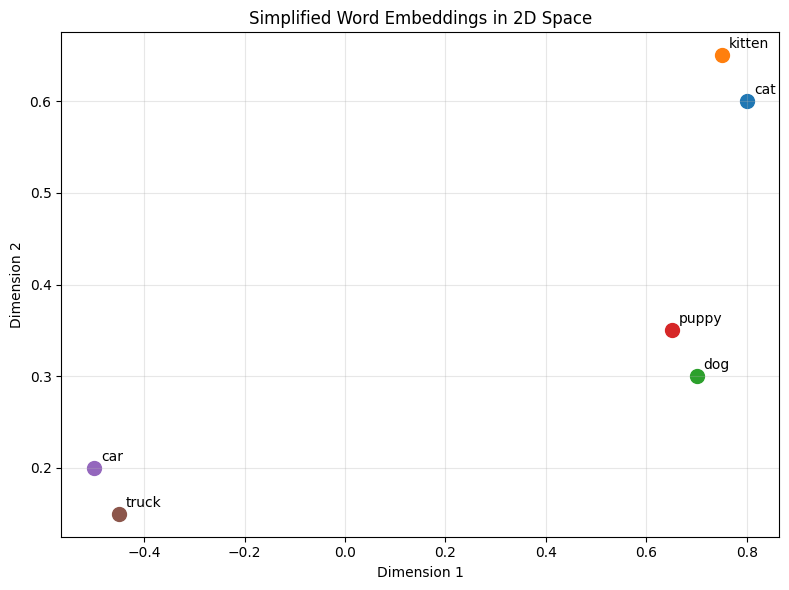

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [6]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.43718588548916804)

### Creating The First Embeddings

In [7]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




c:\Users\Panduka Bandara\Desktop\RAG-A-Z\RAG-hello-world\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Panduka Bandara\Desktop\RAG-A-Z\RAG-hello-world\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Panduka Bandara\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activa

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.01816326379776001, -0.09955169260501862, 0.013816063292324543, -0.00812596082687378, 0.014152281917631626, 0.0640648901462555, -0.006253376137465239, -0.0030178879387676716, 0.02528725564479828, -0.020198656246066093, 0.024329712614417076, 0.07435061782598495, 0.05117720365524292, 0.02203848399221897, -0.05830618366599083, 0.015268256887793541, 0.02358434721827507, 0.09455389529466629, -0.06508845090866089, 0.013296686112880707, -0.02049756608903408, -0.05690854415297508, 0.030303286388516426, -0.08365616202354431, 0.026596324518322945, -0.015231472440063953, -0.04361540451645851, 0.053984012454748154, 0.09025716036558151, -0.08893880993127823, 0.03964460641145706, -0.008835036307573318, -0.030343767255544662, 0.07425566762685776, -0.05409920588135719, 0.11108000576496124, 0.03689984232187271, -0.008959880098700523, -0.06140244007110596, -0.003143378533422947, 0.021958207711577415, 0.04220817983150482, -0.028937924

In [9]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.0186611302

## Model Comparison

| Model Name                            | Embedding Size | Description                         | Primary Use Case                        |
| ------------------------------------- | -------------- | ----------------------------------- | --------------------------------------- |
| all-MiniLM-L6-v2                      | 384            | Fast and efficient, good quality    | General purpose, real-time applications |
| all-mpnet-base-v2                     | 768            | Best quality, slower than MiniLM    | When quality matters more than speed    |
| all-MiniLM-L12-v2                     | 384            | Slightly better than L6, bit slower | Good balance of speed and quality       |
| multi-qa-MiniLM-L6-cos-v1             | 384            | Optimized for question-answering    | Q&A systems, semantic search            |
| paraphrase-multilingual-MiniLM-L12-v2 | 384            | Supports 50+ languages              | Multilingual applications               |
